In [1]:
# Load the packages
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
import sys
import csv
import math
import keras
import argparse
import scipy.io
import sklearn
import sklearn.datasets
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/affine/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN
from keras.regularizers import L1L2
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.optimizers import SGD

In [3]:
#Load dataset
master_data= pd.read_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/tgs-data-science-master-c3f8b3a2900f40ddde655f8ef5f17d00cfaa7033/data/Master_dataset_v1.csv')

/home/affine/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,20,23,25,34,48,65,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Columns in dataset
master_data.columns

Index(['Unnamed: 0', 'WellId', 'LeaseId', 'GroupId', 'API', 'FieldName_x',
       'Well Name and Number', 'WellNumber_x', 'OperatorName_x', 'StateName_x',
       'County_x', 'ProductionMonthYear', 'DaysOnProduction', 'Gas', 'Oil',
       'Water', 'ProductionType', 'ProductionTypeName', 'WellsReported',
       'AllocationMethod', 'DisplayFormation_x', 'StateLeaseId', 'WellName',
       'WellNumber_y', 'BasinName', 'DisplayFormation_y', 'Township',
       'TownshipDirection', 'Range', 'RangeDirection', 'Section', 'District',
       'Abstract', 'Survey', 'Block', 'Offshore', 'Area', 'OffshoreBlock',
       'QuarterQuarter', 'FootageNS', 'DirectionNS', 'FootageEW',
       'DirectionEW', 'SurfaceLatitude', 'SurfaceLongitude', 'BottomLatitude',
       'BottomLongitude', 'SpudDate', 'PlugDate', 'CompletionDate',
       'FirstProductionDate', 'FirstMonth', 'HasProduction', 'WellType',
       'TotalVerticalDepth', 'MeasuredDepth', 'ElevationGround',
       'ElevationKellyBushing', 'ElevationWat

In [5]:
#selecting Operator 'Occidental W TX OVERTHRUST INC.'
master_data1=master_data[master_data.OperatorName_x=="OCCIDENTAL W TX OVERTHRUST INC."]
#master_data1.head()

In [6]:
#select required API
master_data1=master_data1[master_data1.API==42371380040000]#42371381890000]#42371381890000]#42371378930000]
labels=['Oil','ProductionMonthYear1','YearMonth']
master_data1=master_data1[labels]

#Sort data based on YearMonth
master_data1=master_data1.sort_values(by=['YearMonth'])#, ascending=[1, 1],axis=1)
#master_data1.tail()

In [7]:
master_data2=master_data1
master_data2=pd.DataFrame(master_data2)
# master_data2['start_date']=datetime.strptime(master_data1['ProductionMonthYear1'].iloc[0], "%Y-%m-%d")
# print(type(pd.DataFrame(master_data2['start_date']).iloc[0,0]))
# print(type(pd.DataFrame(master_data2['ProductionMonthYear1']).iloc[0,0]))

In [8]:
# master_data2['ProductionMonthYear1']=master_data2['ProductionMonthYear1'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# master_data2['days_age']=master_data2['ProductionMonthYear1'].sub(master_data2['start_date'])
# master_data2['days_age']=master_data2['days_age']/np.timedelta64(1,'D')

In [9]:
#Set YearMonth as Index for production
master_data2=master_data2[['YearMonth','Oil']]#,'days_age']]
master_data2=master_data2.iloc[:-2,:]# removing 201708 & 201709 values as they were zeros
master_data2.set_index('YearMonth')

,Oil
YearMonth,
200711,278.0
200712,230.0
200801,804.0
200802,264.0
200803,273.0
200804,212.0
200805,193.0
200806,160.0
200807,395.0


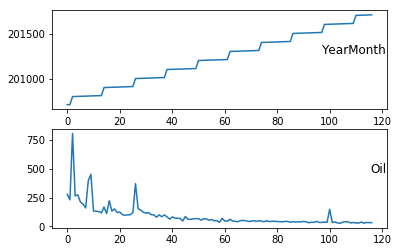

In [10]:
from matplotlib import pyplot
# load dataset
dataset = master_data2
values = dataset.values

# specify columns to plot
groups = [0,1]#,2]#3,4]#,5,6,7,8,9,10]
i = 0
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i+1)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [11]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [12]:
#Define lag(time steps for training) and n_seq(number of time steps to be predicted in future)
n_seq = 12
n_feature=1
n_lag= 24


In [13]:
# load dataset
dataset = master_data2.iloc[:,1:]
values = dataset.values
print(values.shape)
# ensure all data is float
values = values.astype('float32')
#print(values)

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, n_lag, n_seq)

# drop columns we don't want to predict
# reframed.drop(reframed.iloc[:,25:], axis=1, inplace=True)
print(reframed.head())
print(reframed.shape)

(117, 1)
    var1(t-24)  var1(t-23)  var1(t-22)  var1(t-21)  var1(t-20)  var1(t-19)  \
24    0.323037    0.261261    1.000000    0.305019    0.316602    0.238095   
25    0.261261    1.000000    0.305019    0.316602    0.238095    0.213642   
26    1.000000    0.305019    0.316602    0.238095    0.213642    0.171171   
27    0.305019    0.316602    0.238095    0.213642    0.171171    0.473616   
28    0.316602    0.238095    0.213642    0.171171    0.473616    0.545689   

    var1(t-18)  var1(t-17)  var1(t-16)  var1(t-15)     ...      var1(t+2)  \
24    0.213642    0.171171    0.473616    0.545689     ...       0.441441   
25    0.171171    0.473616    0.545689    0.136422     ...       0.162162   
26    0.473616    0.545689    0.136422    0.135135     ...       0.148005   
27    0.545689    0.136422    0.135135    0.131274     ...       0.122265   
28    0.136422    0.135135    0.131274    0.115830     ...       0.113256   

    var1(t+3)  var1(t+4)  var1(t+5)  var1(t+6)  var1(t+7)  

In [14]:
# split into train and test sets
values = reframed.values
train = values[:-1, :]
test = values[-1:, :]

# split into input and outputs
train_X, train_y = train[:, :-(n_seq)], train[:, -(n_seq):]
test_X, test_y = test[:, :-n_seq], test[:, -n_seq:]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_feature))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_feature))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(81, 24, 1) (81, 12) (1, 24, 1) (1, 12)


In [15]:
#Hyperparameters
h1=n_lag*2
h2=n_lag*2
h3=n_seq
h4=n_seq
drop1=0.4
drop2=0.3
drop3=0.0 
drop4=0.0
n_y=n_seq
epoch=1000
batch_size=16
lr=0.0009
L1=0.00
L2=0.01

In [16]:
# model.add(LSTM(h1, batch_input_shape=(batch_size,train_X.shape[1],train_X.shape[2]), stateful=True))#,return_sequences=True, recurrent_regularizer=reg))

In [17]:
# design network
model = Sequential()
reg = L1L2(l1=L1, l2=L2)
model.add(LSTM(h1, input_shape=(train_X.shape[1],train_X.shape[2]),return_sequences=True, recurrent_regularizer=reg))
model.add(Dropout(drop1, seed = 1))
model.add(LSTM(h2,return_sequences=True))
model.add(Dropout(drop2, seed = 1))
model.add(LSTM(h3,return_sequences=True))
model.add(Dropout(drop3, seed = 1))
model.add(LSTM(h4,return_sequences=False))
model.add(Dropout(drop4, seed = 1))
model.add(Dense(n_seq, activation='relu'))
model.add(Dense(n_y, activation='relu'))
adam = Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mae', optimizer= adam)



In [18]:
# model=load_model('LSTM_12_month.h5')
# weights=model.get_weights()
# print(weights)
# model.save_weights('weights.hdf5')
# model.set_weights(weights)
# model.load_weights('weights.hdf5')
# model.load_weights('weights_42371381890000.hdf5')

Train on 76 samples, validate on 1 samples
Epoch 1/1000
 - 2s - loss: 0.3296 - val_loss: 0.3156
Epoch 2/1000
 - 0s - loss: 0.3210 - val_loss: 0.3087
Epoch 3/1000
 - 0s - loss: 0.3133 - val_loss: 0.3017
Epoch 4/1000
 - 0s - loss: 0.3060 - val_loss: 0.2944
Epoch 5/1000
 - 0s - loss: 0.2988 - val_loss: 0.2870
Epoch 6/1000
 - 0s - loss: 0.2920 - val_loss: 0.2800
Epoch 7/1000
 - 0s - loss: 0.2854 - val_loss: 0.2733
Epoch 8/1000
 - 0s - loss: 0.2789 - val_loss: 0.2670
Epoch 9/1000
 - 0s - loss: 0.2726 - val_loss: 0.2609
Epoch 10/1000
 - 0s - loss: 0.2664 - val_loss: 0.2551
Epoch 11/1000
 - 0s - loss: 0.2602 - val_loss: 0.2492
Epoch 12/1000
 - 0s - loss: 0.2543 - val_loss: 0.2435
Epoch 13/1000
 - 0s - loss: 0.2486 - val_loss: 0.2380
Epoch 14/1000
 - 0s - loss: 0.2429 - val_loss: 0.2326
Epoch 15/1000
 - 0s - loss: 0.2375 - val_loss: 0.2273
Epoch 16/1000
 - 0s - loss: 0.2321 - val_loss: 0.2221
Epoch 17/1000
 - 0s - loss: 0.2269 - val_loss: 0.2170
Epoch 18/1000
 - 0s - loss: 0.2217 - val_loss: 0

 - 0s - loss: 0.0169 - val_loss: 0.0128
Epoch 152/1000
 - 0s - loss: 0.0166 - val_loss: 0.0125
Epoch 153/1000
 - 0s - loss: 0.0164 - val_loss: 0.0122
Epoch 154/1000
 - 0s - loss: 0.0162 - val_loss: 0.0120
Epoch 155/1000
 - 0s - loss: 0.0159 - val_loss: 0.0118
Epoch 156/1000
 - 0s - loss: 0.0157 - val_loss: 0.0116
Epoch 157/1000
 - 0s - loss: 0.0155 - val_loss: 0.0114
Epoch 158/1000
 - 0s - loss: 0.0153 - val_loss: 0.0113
Epoch 159/1000
 - 0s - loss: 0.0151 - val_loss: 0.0111
Epoch 160/1000
 - 0s - loss: 0.0149 - val_loss: 0.0108
Epoch 161/1000
 - 0s - loss: 0.0147 - val_loss: 0.0106
Epoch 162/1000
 - 0s - loss: 0.0145 - val_loss: 0.0104
Epoch 163/1000
 - 0s - loss: 0.0143 - val_loss: 0.0102
Epoch 164/1000
 - 0s - loss: 0.0141 - val_loss: 0.0100
Epoch 165/1000
 - 0s - loss: 0.0139 - val_loss: 0.0099
Epoch 166/1000
 - 0s - loss: 0.0138 - val_loss: 0.0098
Epoch 167/1000
 - 0s - loss: 0.0136 - val_loss: 0.0096
Epoch 168/1000
 - 0s - loss: 0.0134 - val_loss: 0.0094
Epoch 169/1000
 - 0s - lo

 - 0s - loss: 0.0059 - val_loss: 0.0025
Epoch 301/1000
 - 0s - loss: 0.0058 - val_loss: 0.0025
Epoch 302/1000
 - 0s - loss: 0.0058 - val_loss: 0.0026
Epoch 303/1000
 - 0s - loss: 0.0059 - val_loss: 0.0026
Epoch 304/1000
 - 0s - loss: 0.0059 - val_loss: 0.0026
Epoch 305/1000
 - 0s - loss: 0.0059 - val_loss: 0.0026
Epoch 306/1000
 - 0s - loss: 0.0059 - val_loss: 0.0025
Epoch 307/1000
 - 0s - loss: 0.0059 - val_loss: 0.0025
Epoch 308/1000
 - 0s - loss: 0.0058 - val_loss: 0.0025
Epoch 309/1000
 - 0s - loss: 0.0059 - val_loss: 0.0025
Epoch 310/1000
 - 0s - loss: 0.0058 - val_loss: 0.0025
Epoch 311/1000
 - 0s - loss: 0.0058 - val_loss: 0.0025
Epoch 312/1000
 - 0s - loss: 0.0058 - val_loss: 0.0025
Epoch 313/1000
 - 0s - loss: 0.0057 - val_loss: 0.0025
Epoch 314/1000
 - 0s - loss: 0.0057 - val_loss: 0.0024
Epoch 315/1000
 - 0s - loss: 0.0057 - val_loss: 0.0024
Epoch 316/1000
 - 0s - loss: 0.0057 - val_loss: 0.0025
Epoch 317/1000
 - 0s - loss: 0.0057 - val_loss: 0.0025
Epoch 318/1000
 - 0s - lo

 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 450/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 451/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 452/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 453/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 454/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 455/1000
 - 0s - loss: 0.0055 - val_loss: 0.0023
Epoch 456/1000
 - 0s - loss: 0.0056 - val_loss: 0.0023
Epoch 457/1000
 - 0s - loss: 0.0056 - val_loss: 0.0023
Epoch 458/1000
 - 0s - loss: 0.0056 - val_loss: 0.0022
Epoch 459/1000
 - 0s - loss: 0.0055 - val_loss: 0.0022
Epoch 460/1000
 - 0s - loss: 0.0055 - val_loss: 0.0023
Epoch 461/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 462/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 463/1000
 - 0s - loss: 0.0055 - val_loss: 0.0022
Epoch 464/1000
 - 0s - loss: 0.0055 - val_loss: 0.0023
Epoch 465/1000
 - 0s - loss: 0.0055 - val_loss: 0.0023
Epoch 466/1000
 - 0s - loss: 0.0055 - val_loss: 0.0023
Epoch 467/1000
 - 0s - lo

 - 0s - loss: 0.0054 - val_loss: 0.0023
Epoch 599/1000
 - 0s - loss: 0.0054 - val_loss: 0.0023
Epoch 600/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 601/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 602/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 603/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 604/1000
 - 0s - loss: 0.0054 - val_loss: 0.0023
Epoch 605/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 606/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 607/1000
 - 0s - loss: 0.0054 - val_loss: 0.0023
Epoch 608/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 609/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 610/1000
 - 0s - loss: 0.0055 - val_loss: 0.0022
Epoch 611/1000
 - 0s - loss: 0.0055 - val_loss: 0.0022
Epoch 612/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 613/1000
 - 0s - loss: 0.0055 - val_loss: 0.0023
Epoch 614/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 615/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 616/1000
 - 0s - lo

 - 0s - loss: 0.0054 - val_loss: 0.0023
Epoch 748/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 749/1000
 - 0s - loss: 0.0054 - val_loss: 0.0021
Epoch 750/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 751/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 752/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 753/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 754/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 755/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 756/1000
 - 0s - loss: 0.0054 - val_loss: 0.0021
Epoch 757/1000
 - 0s - loss: 0.0054 - val_loss: 0.0021
Epoch 758/1000
 - 0s - loss: 0.0055 - val_loss: 0.0022
Epoch 759/1000
 - 0s - loss: 0.0055 - val_loss: 0.0022
Epoch 760/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 761/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 762/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 763/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 764/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 765/1000
 - 0s - lo

 - 0s - loss: 0.0054 - val_loss: 0.0021
Epoch 897/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 898/1000
 - 0s - loss: 0.0054 - val_loss: 0.0023
Epoch 899/1000
 - 0s - loss: 0.0054 - val_loss: 0.0023
Epoch 900/1000
 - 0s - loss: 0.0053 - val_loss: 0.0021
Epoch 901/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 902/1000
 - 0s - loss: 0.0053 - val_loss: 0.0022
Epoch 903/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 904/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 905/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 906/1000
 - 0s - loss: 0.0055 - val_loss: 0.0023
Epoch 907/1000
 - 0s - loss: 0.0054 - val_loss: 0.0021
Epoch 908/1000
 - 0s - loss: 0.0054 - val_loss: 0.0021
Epoch 909/1000
 - 0s - loss: 0.0054 - val_loss: 0.0023
Epoch 910/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 911/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 912/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 913/1000
 - 0s - loss: 0.0054 - val_loss: 0.0022
Epoch 914/1000
 - 0s - lo

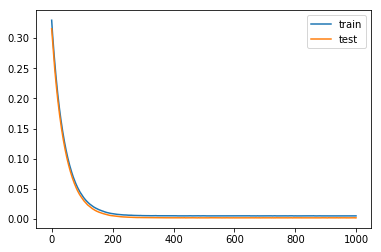

In [79]:
# fit network
history = model.fit(train_X, train_y, epochs = epoch, batch_size = batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
model.save('LSTM_12_month_42371381890000.h5')
# del model

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [19]:
#SAVE THE MODEL

# model.save('LSTM_12_month_42371381890000.h5')
model=load_model('LSTM_12_month_42371380040000.h5')
# weights=model.get_weights()
# print(weights)
#model.save_weights('weights_42371380040000.hdf5')
# model.set_weights(weights)
weights=model.load_weights('weights_42371380040000.hdf5')
# model.set_weights(weights)

In [20]:
#Predict the model on test
yhat = model.predict(test_X)
# print(yhat.shape)
# print(test_y.shape)

# invert scaling for forecast
inv_yhat = scaler.inverse_transform(yhat)
# print(inv_yhat.shape)
inv_yhat = inv_yhat[:,:]

# invert scaling for actual
inv_y = scaler.inverse_transform(test_y)
inv_y = inv_y[:,:]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

#def mean_absolute_error(y_true, y_pred):
MAE = mean_absolute_error(inv_y, inv_yhat)
print("MAE = "+str(MAE))

Test RMSE: 5.811
MAE = 4.69994


In [21]:
# make a prediction on train
yhat_train = model.predict(train_X)

# invert scaling for train forecast
inv_yhat_train = scaler.inverse_transform(yhat_train)

# invert scaling for actual train
inv_y_train = scaler.inverse_transform(train_y)

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
print('Train RMSE: %.3f' % rmse)

#def mean_absolute_error(y_true, y_pred):
MAE_train = mean_absolute_error(inv_y_train, inv_yhat_train)
print("MAE Train = "+str(MAE_train))

Train RMSE: 18.423
MAE Train = 7.3094


In [22]:
# Calculate Mape
# Note LSTM always gives 1 step shifted reponse

#test Mape
Mape_test1=[]
for i in range(n_seq-1):
    mape1=(np.abs(inv_y[:,i]-inv_yhat[:,i+1])/(inv_y[:,i]+1))
    Mape_test1.append(mape1)
#print(Mape_test1)
Mape_test=np.mean(Mape_test1)

#Mape_test=np.mean(np.abs(inv_y[i]-inv_yhat[i+1])/(inv_y[i]+1))
#Mape_train=np.mean(np.abs(inv_y_train[i]-inv_yhat_train[i+1])/(inv_y_train[i]+1))
Mape_train=np.mean(np.abs(inv_y_train-inv_yhat_train)/(inv_y_train+1))

print("MAPE Train = "+str(Mape_train))
print("MAPE Test = "+str(Mape_test))

MAPE Train = 0.103835
MAPE Test = 0.0115226


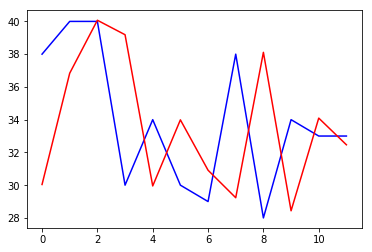

In [23]:
df1=pd.DataFrame(inv_y)
df2=pd.DataFrame(inv_yhat)
value1=df1.values
value2=df2.values
value1=value1.reshape(n_seq,1)
value2=value2.reshape(n_seq,1)
plt.figure()
plt.plot(value1,'b')
plt.plot(value2,'r')
plt.show()

In [24]:
# df1=pd.DataFrame(inv_y_train[0,:])
# df2=pd.DataFrame(inv_yhat_train[0,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

# df1=pd.DataFrame(inv_y_train[20,:])
# df2=pd.DataFrame(inv_yhat_train[20,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

# df1=pd.DataFrame(inv_y_train[40,:])
# df2=pd.DataFrame(inv_yhat_train[40,:])
# print(inv_y_train.shape)
# value1=df1.values
# value2=df2.values
# value1=value1.reshape(n_seq,1)
# value2=value2.reshape(n_seq,1)
# plt.figure()
# plt.plot(value1,'b')
# plt.plot(value2,'r')
# plt.show()

In [25]:
for i in range(len(inv_y)):
    for j in range(len(inv_y[i])):
        print(str(inv_y[i][j])+", "+str(inv_yhat[i][j]))

38.0, 30.0402
40.0, 36.8371
40.0, 40.071
30.0, 39.1867
34.0, 29.9523
30.0, 33.9883
29.0, 30.9121
38.0, 29.2337
28.0, 38.1109
34.0, 28.4354
33.0, 34.0946
33.0, 32.4656


In [26]:
# get test results in CSV
df1=pd.DataFrame(inv_y[:,:-1])
df1=pd.DataFrame.transpose(df1)
df2=pd.DataFrame(inv_yhat[:,1:])
df2=pd.DataFrame.transpose(df2)
df3=pd.DataFrame(np.array(master_data2.iloc[-n_seq:-1,:]))
df3.columns=['YearMonth','Oil']
df4=pd.concat([df3,df1,df2],axis=1)
df4.columns=['YearMonth','Oil','Oil_Actual','Oil_Predicted']
print(df4)

    YearMonth   Oil  Oil_Actual  Oil_Predicted
0    201608.0  38.0   38.000000      36.837074
1    201609.0  40.0   40.000000      40.070953
2    201610.0  40.0   40.000000      39.186672
3    201611.0  30.0   29.999998      29.952286
4    201612.0  34.0   34.000000      33.988335
5    201701.0  30.0   29.999998      30.912132
6    201702.0  29.0   29.000002      29.233669
7    201703.0  38.0   38.000000      38.110905
8    201704.0  28.0   28.000000      28.435392
9    201705.0  34.0   34.000000      34.094631
10   201706.0  33.0   33.000000      32.465649


In [28]:
df4.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/API_42371380040000_prediction.csv')

In [40]:
inv_y_train=pd.DataFrame(inv_y_train)
inv_y_train.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/API_42371380040000_inv_y_train.csv')

In [42]:
inv_yhat_train=pd.DataFrame(inv_yhat_train)
inv_yhat_train.to_csv('/home/affine/Downloads/Deep_Learning/demo/demo/TGS/Models/Outputs/API_42371380040000_inv_yhat_train.csv')

In [36]:
train_df1=pd.DataFrame(inv_y_train)
train_df11=train_df1.iloc[0,:]
#print(train_df11)
train_df12=train_df1.iloc[1:,-1]
#print(train_df12)
df_train=pd.concat([train_df11,train_df12], axis=0)
df_train1=pd.DataFrame(np.array(df_train))
df_train1

,0
0,101.000000
1,121.000008
2,370.000000
3,153.000000
4,142.000000
5,122.000000
6,114.999992
7,119.000000
8,102.000000
9,100.000008


In [38]:
train_df2=pd.DataFrame(inv_yhat_train)
train_df11=train_df2.iloc[0,:]
#print(train_df11)
train_df12=train_df1.iloc[1:,-1]
#print(train_df12)
df_train_pred=pd.concat([train_df11,train_df12], axis=0)
df_train_pred1=pd.DataFrame(np.array(df_train_pred))
df_train_pred1

,0
0,113.478851
1,140.230469
2,198.189270
3,139.380997
4,125.369446
5,117.864075
6,113.914398
7,103.331642
8,97.857445
9,94.114571


In [43]:
# train_pred=pd.concat([df_train,df_train_pred1],axis=1)
# train_pred